# Predict the survival status of passengers on Titanic

In [2]:
#importing the libraries 
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#reading the file 
df = pd.read_csv(r"C:\Users\DELL\Downloads\train.csv")

## Exploratory Data Analysis

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data preprocessing

In [7]:
print("Percentage of missing values in Cabin Column", (687/len(df)*100))

Percentage of missing values in Cabin Column 77.10437710437711


#### Since more that 60% of values are null, it is safe to drop that column. 

In [8]:
#dropping column Cabin
df = df.drop('Cabin', axis =1)

In [9]:
#filling missing values in column Age with median 
df['Age'].fillna(df['Age'].median(), inplace = True)

C:\Users\DELL\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

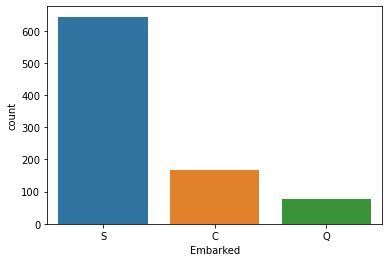

In [10]:
#visulaising the count of column Embarked 
sns.countplot(df['Embarked'])

In [11]:
#filling null values in column Embarked with mode
df ['Embarked'].fillna('S', inplace= True)

In [12]:
#checking for null values in the cleaned dataset
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [13]:
#statistical summary of numerical features of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#dropping column Name, Ticket and PassengerId since they are simply used to identify the rows 
df = df.drop ("Name", axis = 1)
df = df.drop ("Ticket", axis = 1)
df = df.drop ("PassengerId", axis = 1)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
#encoding categorical variables Sex and Embarked 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df ['Sex'] = le.fit_transform(df['Sex'])
df ['Embarked'] = le.fit_transform(df['Embarked'])

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [18]:
df.shape

(891, 8)

In [19]:
#assigning feature and target variables in the trianing dataset
X_train = df.iloc [:, 1:8].values
Y_train = df.iloc [:, 0].values

### Model Building

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

#Support Vector Classifier
from sklearn.svm import SVC
svm = SVC (kernel = 'linear', random_state = None)
svm.fit(X_train, Y_train)

#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier (n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit (X_train, Y_train)


C:\Users\DELL\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Test data preprocessing 

In [21]:
df_test = pd.read_csv(r"C:\Users\DELL\Downloads\test.csv")

In [22]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
df_test = df_test.drop("PassengerId", axis = 1)
df_test = df_test.drop("Name", axis = 1)
df_test = df_test.drop("Ticket", axis = 1)
df_test = df_test.drop("Cabin", axis = 1)

In [24]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
df_test ['Sex'] = le.fit_transform(df_test['Sex'])
df_test ['Embarked'] = le.fit_transform(df_test['Embarked'])

In [27]:
X_test = df.iloc [:, 1:8].values
Y_test =  df.iloc [:, 0].values

### Testing model performance on test data

In [28]:
from sklearn.metrics import accuracy_score

y_log_pred = log.predict(X_test)
print("Logistic Regression Accuracy", accuracy_score(y_log_pred, Y_test))

y_svm_pred = svm.predict(X_test)
print("Support Vector Classifier Accuracy", accuracy_score(y_svm_pred, Y_test))

y_tree_pred = tree.predict(X_test)
print("Decision Tree Accuracy", accuracy_score(y_tree_pred, Y_test))

y_forest_pred = forest.predict(X_test)
print("Random Forest Accuracy", accuracy_score(y_forest_pred, Y_test))

Logistic Regression Accuracy 0.8002244668911336
Support Vector Classifier Accuracy 0.7867564534231201
Decision Tree Accuracy 0.9797979797979798
Random Forest Accuracy 0.9663299663299664


## Accuracy of models 
1. **Logistic Regression Accuracy** 0.8002244668911336
1. **Support Vector Classifier Accuracy** 0.7867564534231201
1. **Decision Tree Accuracy** 0.9797979797979798
1. **Random Forest Accuracy** 0.9663299663299664